In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# NLP
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error

import shap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('max_colwidth', None)

In [2]:
MFcombine = pd.read_csv('MFCombine.csv')[['review', 'ratings', 'reviewer_name', 'category']]
MFcombine.head(1)

,review,ratings,reviewer_name,category
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat


In [3]:
# lets try without stop words and lem

In [4]:
# tokenizer = tokenizer = RegexpTokenizer(r'\w+', gaps=False)

In [5]:
# MFcombine['review_token'] = MFcombine['review'].apply(tokenizer.tokenize)

In [6]:
MFcombine.head(1)

,review,ratings,reviewer_name,category
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat


In [7]:
def sentiment(x):
    '''
    Input will be a string
    Output returns the sentiment score of the string
    '''
    sent = SentimentIntensityAnalyzer() # Instantiate
    return sent.polarity_scores(x) # Calculating the scores of each document

In [8]:
MFcombine['sentiment'] = MFcombine['review'].apply(sentiment)

In [9]:
MFcombine.head(2)

,review,ratings,reviewer_name,category,sentiment
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat,"{'neg': 0.069, 'neu': 0.872, 'pos': 0.059, 'compound': -0.2238}"
1,shocked my meat eating friends with these delicious things absolutely brilliant i jumped on to leave my first good review as i have been shocked at how tasty these were nice and chewy substantial haters may hate but i haven t read a clever low rated review of them which makes me think it s the anti vegan brigade not meant to be a beef substitute as such just meant to be food for those who prefer to salivate without slaughter recommended i m now going to try all the other fashionable plant based burgers which i was previously disbelieving of if they re as good as these i m in new food heaven with new food choices galore whoop,5,suzie,burger_meat,"{'neg': 0.124, 'neu': 0.69, 'pos': 0.186, 'compound': 0.8795}"


In [10]:
MFcombine['word_compound']  = MFcombine['sentiment'].apply(lambda score_dict: score_dict['compound'])

In [11]:
MFcombine.head(1)

,review,ratings,reviewer_name,category,sentiment,word_compound
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat,"{'neg': 0.069, 'neu': 0.872, 'pos': 0.059, 'compound': -0.2238}",-0.2238


In [12]:
def assign_compound(x):
    if x == 0:
        return 3
    elif x > 0:
        return 5
    elif x < 0:
        return 1

In [13]:
MFcombine['word_comp_score'] = MFcombine['word_compound'].apply(assign_compound)

In [14]:
MFcombine.head(5)

,review,ratings,reviewer_name,category,sentiment,word_compound,word_comp_score
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat,"{'neg': 0.069, 'neu': 0.872, 'pos': 0.059, 'compound': -0.2238}",-0.2238,1
1,shocked my meat eating friends with these delicious things absolutely brilliant i jumped on to leave my first good review as i have been shocked at how tasty these were nice and chewy substantial haters may hate but i haven t read a clever low rated review of them which makes me think it s the anti vegan brigade not meant to be a beef substitute as such just meant to be food for those who prefer to salivate without slaughter recommended i m now going to try all the other fashionable plant based burgers which i was previously disbelieving of if they re as good as these i m in new food heaven with new food choices galore whoop,5,suzie,burger_meat,"{'neg': 0.124, 'neu': 0.69, 'pos': 0.186, 'compound': 0.8795}",0.8795,5
2,best meatless burgers on the market hubby and i were not sure whether to try meatless burgers we have tried different ones from time to time and found them to be rubbery and not nice at allwe were both surprised by the texture and taste of these burgers they are thick and juicy and the taste is superb they actually do taste like meat but are completely meat free we will certainly buy them again,5,veronica clark,burger_meat,"{'neg': 0.037, 'neu': 0.772, 'pos': 0.191, 'compound': 0.9212}",0.9212,5
3,worst vegan burger available how could anyone eat these they taste of sawdust and despair,1,marge,burger_meat,"{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compound': -0.7506}",-0.7506,1
4,truly disgusting honestly never tried anything quite as revolting as these really can t believe that anyone at all likes these even accounting for variances in taste beyond burgers on are a different league to these,1,rc,burger_meat,"{'neg': 0.081, 'neu': 0.713, 'pos': 0.207, 'compound': 0.6486}",0.6486,5


In [15]:
MFcombine[['ratings', 'word_compound', 'word_comp_score']].head()

,ratings,word_compound,word_comp_score
0,2,-0.2238,1
1,5,0.8795,5
2,5,0.9212,5
3,1,-0.7506,1
4,1,0.6486,5


In [16]:
MFcombine['difference'] = abs(MFcombine['ratings'] - MFcombine['word_comp_score'])

In [17]:
MFcombine['status'] = np.where(MFcombine['difference']<=2, 'correct', 'incorrect' )

In [18]:
MFcombine['status'].value_counts()

correct      181
incorrect     24
Name: status, dtype: int64

In [19]:
MFcombine.head(1)

,review,ratings,reviewer_name,category,sentiment,word_compound,word_comp_score,difference,status
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat,"{'neg': 0.069, 'neu': 0.872, 'pos': 0.059, 'compound': -0.2238}",-0.2238,1,1,correct


In [20]:
# add stopwords and lemm

In [21]:
stopwords_basic = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'browser', 'support', 'video']

In [22]:
stopwords_add = ['great', 'good']

In [23]:
# stopwords_add = ['meatless', 'great', 'good', 'plant', 'love', 'like', 'bit', 'quite', 'awful', 'little', 'eat', 'free', 'lot', 'bad', 'alternative', 'food', 'bought', 'really', 'ever', 'tried', 'option', 'flavour', 'vegan', 'worst', 'yuck', 'much', 'pretty', 'amazing', 'based', 'need', 'meat',  'thing', 'loved', 'covering']

In [24]:
stopwords = stopwords_basic + stopwords_add

In [25]:
tokenizer = tokenizer = RegexpTokenizer(r'\w+', gaps=False)

In [26]:
MFcombine['tokenized'] = MFcombine['review'].apply(tokenizer.tokenize).apply(lambda x: [item for item in x if item not in stopwords])


In [27]:
# lemmatise


def lem(x):
#-----------------------------------
# Input:
# x - post text
# Output:
# string of lemmatized words
#-----------------------------------
    lemmatizer = WordNetLemmatizer()
    
    #lemmatize words
    lemm_words = [lemmatizer.lemmatize(word.lower()) for word in x]
    
    #return lemmatized and stem words in a string
    return ' '.join(lemm_words)  

In [28]:
MFcombine['lemmatized_reviews'] = MFcombine['tokenized'].apply(lem)

In [29]:
MFcombine.head(2)

,review,ratings,reviewer_name,category,sentiment,word_compound,word_comp_score,difference,status,tokenized,lemmatized_reviews
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat,"{'neg': 0.069, 'neu': 0.872, 'pos': 0.059, 'compound': -0.2238}",-0.2238,1,1,correct,"[beef, replacment, go, something, else, looked, move, away, meat, looking, burger, replacement, hoping, would, least, come, close, beyond, burger, alas, soft, spongy, texure, odd, tasteif, looking, beef, burger, replacement, tastes, feels, like, beef, go, bean, burger, least, know, getting]",beef replacment go something else looked move away meat looking burger replacement hoping would least come close beyond burger ala soft spongy texure odd tasteif looking beef burger replacement taste feel like beef go bean burger least know getting
1,shocked my meat eating friends with these delicious things absolutely brilliant i jumped on to leave my first good review as i have been shocked at how tasty these were nice and chewy substantial haters may hate but i haven t read a clever low rated review of them which makes me think it s the anti vegan brigade not meant to be a beef substitute as such just meant to be food for those who prefer to salivate without slaughter recommended i m now going to try all the other fashionable plant based burgers which i was previously disbelieving of if they re as good as these i m in new food heaven with new food choices galore whoop,5,suzie,burger_meat,"{'neg': 0.124, 'neu': 0.69, 'pos': 0.186, 'compound': 0.8795}",0.8795,5,0,correct,"[shocked, meat, eating, friends, delicious, things, absolutely, brilliant, jumped, leave, first, review, shocked, tasty, nice, chewy, substantial, haters, may, hate, read, clever, low, rated, review, makes, think, anti, vegan, brigade, meant, beef, substitute, meant, food, prefer, salivate, without, slaughter, recommended, going, try, fashionable, plant, based, burgers, previously, disbelieving, new, food, heaven, new, food, choices, galore, whoop]",shocked meat eating friend delicious thing absolutely brilliant jumped leave first review shocked tasty nice chewy substantial hater may hate read clever low rated review make think anti vegan brigade meant beef substitute meant food prefer salivate without slaughter recommended going try fashionable plant based burger previously disbelieving new food heaven new food choice galore whoop


In [30]:
# set up x and y

X = MFcombine['review']
y = MFcombine['word_compound']

In [31]:
# train test split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

In [32]:
tf = TfidfVectorizer(stop_words=stopwords)

In [33]:
X_tf = tf.fit_transform(X).todense()

In [34]:
# X_test_tf = tf.transform(X_test).todense()

In [35]:
lr = LinearRegression()

In [36]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression

# X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
# >>> regr = RandomForestRegressor(max_depth=2, random_state=0)
# >>> regr.fit(X_train_tf, y_train)
# >>> print(regr.predict([[0, 0, 0, 0]]))
# [-8.32987858]

In [37]:
lr.fit(X_tf, y)

LinearRegression()

In [38]:
y_pred = lr.predict(X_tf)

In [39]:
print ('RMSE is: \n', np.sqrt(metrics.mean_squared_error(y_pred, y)))
print ('R-squared is: \n', round(r2_score(y_pred, y),3))


RMSE is: 
 2.5578853802186836e-15
R-squared is: 
 1.0


In [40]:
X_tf = pd.DataFrame(tf.transform(X).todense(), columns = tf.get_feature_names())
# X_test_tf = pd.DataFrame(tf.transform(X_test).todense(), columns = tf.get_feature_names())

In [41]:
explainer = shap.LinearExplainer(lr, X_tf, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_tf)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


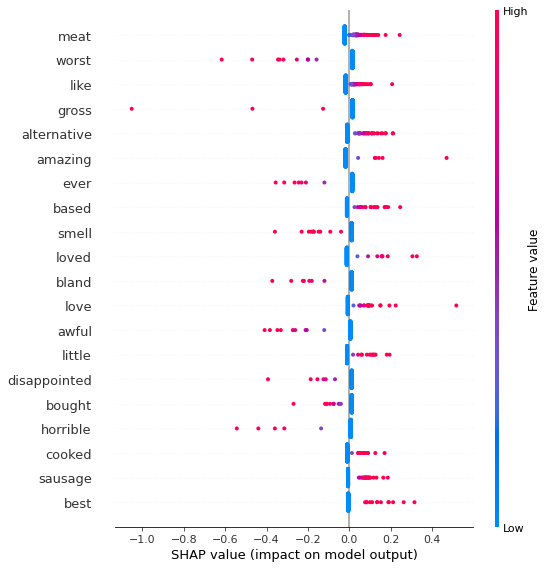

In [42]:
shap.summary_plot(shap_values, X_tf, feature_names=tf.get_feature_names())

In [43]:
MFcombine.columns

Index(['review', 'ratings', 'reviewer_name', 'category', 'sentiment',
       'word_compound', 'word_comp_score', 'difference', 'status', 'tokenized',
       'lemmatized_reviews'],
      dtype='object')

In [44]:
MFcombine[['word_comp_score', 'word_compound', 'difference', 'status', 'ratings']]

,word_comp_score,word_compound,difference,status,ratings
0,1,-0.2238,1,correct,2
1,5,0.8795,0,correct,5
2,5,0.9212,0,correct,5
3,1,-0.7506,0,correct,1
4,5,0.6486,4,incorrect,1
5,5,0.4495,4,incorrect,1
6,1,-0.9052,0,correct,1
7,1,-0.8334,0,correct,1
8,5,0.8555,0,correct,5
9,5,0.8322,0,correct,5


In [45]:
# X_tf = pd.DataFrame(tf.transform(X).todense(), columns = tf.get_feature_names())

In [46]:
# X_tf.head(1)

In [47]:
# explainer = shap.LinearExplainer(lr, X_tf, feature_perturbation="interventional")
# shap_values = explainer.shap_values(X_tf)

In [48]:
# shap.summary_plot(shap_values, X_tf, feature_names=tf.get_feature_names())

In [49]:
MFcombine.head()

,review,ratings,reviewer_name,category,sentiment,word_compound,word_comp_score,difference,status,tokenized,lemmatized_reviews
0,not a beef replacment go for something else having looked to move away from meat for a while i am looking for a burger replacement i was hoping these would at least come close to the beyond burger but alas they do not they have a soft spongy texure and a very odd tasteif you are looking for a beef burger replacement that tastes and feels like beef this is not it do what i did and go for a bean burger at least you know what you are getting,2,rhodri,burger_meat,"{'neg': 0.069, 'neu': 0.872, 'pos': 0.059, 'compound': -0.2238}",-0.2238,1,1,correct,"[beef, replacment, go, something, else, looked, move, away, meat, looking, burger, replacement, hoping, would, least, come, close, beyond, burger, alas, soft, spongy, texure, odd, tasteif, looking, beef, burger, replacement, tastes, feels, like, beef, go, bean, burger, least, know, getting]",beef replacment go something else looked move away meat looking burger replacement hoping would least come close beyond burger ala soft spongy texure odd tasteif looking beef burger replacement taste feel like beef go bean burger least know getting
1,shocked my meat eating friends with these delicious things absolutely brilliant i jumped on to leave my first good review as i have been shocked at how tasty these were nice and chewy substantial haters may hate but i haven t read a clever low rated review of them which makes me think it s the anti vegan brigade not meant to be a beef substitute as such just meant to be food for those who prefer to salivate without slaughter recommended i m now going to try all the other fashionable plant based burgers which i was previously disbelieving of if they re as good as these i m in new food heaven with new food choices galore whoop,5,suzie,burger_meat,"{'neg': 0.124, 'neu': 0.69, 'pos': 0.186, 'compound': 0.8795}",0.8795,5,0,correct,"[shocked, meat, eating, friends, delicious, things, absolutely, brilliant, jumped, leave, first, review, shocked, tasty, nice, chewy, substantial, haters, may, hate, read, clever, low, rated, review, makes, think, anti, vegan, brigade, meant, beef, substitute, meant, food, prefer, salivate, without, slaughter, recommended, going, try, fashionable, plant, based, burgers, previously, disbelieving, new, food, heaven, new, food, choices, galore, whoop]",shocked meat eating friend delicious thing absolutely brilliant jumped leave first review shocked tasty nice chewy substantial hater may hate read clever low rated review make think anti vegan brigade meant beef substitute meant food prefer salivate without slaughter recommended going try fashionable plant based burger previously disbelieving new food heaven new food choice galore whoop
2,best meatless burgers on the market hubby and i were not sure whether to try meatless burgers we have tried different ones from time to time and found them to be rubbery and not nice at allwe were both surprised by the texture and taste of these burgers they are thick and juicy and the taste is superb they actually do taste like meat but are completely meat free we will certainly buy them again,5,veronica clark,burger_meat,"{'neg': 0.037, 'neu': 0.772, 'pos': 0.191, 'compound': 0.9212}",0.9212,5,0,correct,"[best, meatless, burgers, market, hubby, sure, whether, try, meatless, burgers, tried, different, ones, time, time, found, rubbery, nice, allwe, surprised, texture, taste, burgers, thick, juicy, taste, superb, actually, taste, like, meat, completely, meat, free, certainly, buy]",best meatless burger market hubby sure whether try meatless burger tried different one time time found rubbery nice allwe surprised texture taste burger thick juicy taste superb actually taste like meat completely meat free certainly buy
3,worst vegan burger available how could anyone eat these they taste of sawdust and despair,1,marge,burger_meat,"{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compound': 

In [50]:
MFcombine['lemmatized_reviews_split'] = MFcombine['lemmatized_reviews'].str.split()

In [51]:
MFcombine['review_length'] = MFcombine['lemmatized_reviews_split'].apply(len)

In [52]:
MFcombine.groupby('ratings')['review_length'].mean()

ratings
1    20.933333
2    24.888889
3    33.526316
4    18.500000
5    18.035294
Name: review_length, dtype: float64